tl: (11, 215) br: (25, 2215)
(4637, 488)


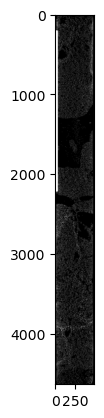

In [16]:
#This script matches jpgs from the atl_jpg and chirop_jpg folders.
#The width of the chiroptera lidar is about 490 meters.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
atl_path = '../make_image/atl_jpg/atl_0_4.jpg'
chirop_path = '../make_image/chirop_jpg/chirop_0_4.jpg'

img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()

template = cv.imread(atl_path, cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

meth = 'cv.TM_CCOEFF_NORMED'

method = eval(meth)

# Apply template matching
res = cv.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
print(f'tl: {top_left} br: {bottom_right}')
print(img2.shape)
cv.rectangle(img2, top_left, bottom_right, 255, 20)

# plt.subplot(121)
# plt.imshow(res,cmap = 'gray')
# plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

plt.imshow(img2,cmap = 'gray')